# AICE Associate 연습문제

## 심장병 예측 (Heart Failure Prediction)

심장병 데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 심장병 여부를 예측하고 결과를 분석하세요.

---
id: 데이터 고유 id <br>
age: 나이 <br>
sex: 성별 <br>
dataset: 데이터가 수집된 위치 <br>
cp: 가슴 통증 종류 <br>
trestbps: 휴식 중 혈압(mmHg) <br>
chol: 혈중 콜레스테롤 (mg/dl) <br>
fbs: 공복 중 혈당<br>
restecg: 휴식 중 심전도 결과 <br>
thalch: 최대 심박수 <br>
exang: 활동으로 인한  협심증 여부<br>
oldpeak: 휴식 대비 운동으로 인한 ST 하강 <br>
slope: 활동 ST 분절 피크의 기울기 <br>
num: 심장병 레이블 (0: 없음, 1 이상: 있음) <br>
ca: 형광 투시로 확인된 주요 혈관 수<br>
thal: 지중해빈혈 여부 <br>

---

### 1. pandas 라이브러리를 별칭 pd로 임포트하는 코드를 작성하고 실행하세요. 
---
- 설치되어 있지 않으면 설치해서 임포트하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

다음 문항을 풀기 전에 아래의 코드를 실행하세요.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc("font", family="NanumGothicCoding")

<br>

### 2. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다. 
---
pandas 함수로 데이터 파일을 읽고 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
- heart_information.csv 파일을 읽어 df_a에 할당하세요.
- thalassemia_information.csv 파일을 읽어 df_b에 할당하세요.
- df_a와 df_b 데이터프레임을 판다스의 merge 함수를 활용하여 합쳐 데이터프레임 변수명 df에 저장하세요.
    - 합칠 때 사용하는 키(on) : 'id'
    - 합치는 방법(how) : 'inner'
---

In [ ]:
# 여기에 답안코드를 작성하세요.
df_a = pd.read_csv("heart_information.csv")
df_b = pd.read_csv("thalassemia_information.csv")

df = pd.merge(df_a, df_b, on='id', how='inner')
df

<br>

### 3. 합쳐진 데이터프레임을 살펴보려고 합니다.
---
데이터프레임을 요약 및 기초통계기법으로 확인하는 코드를 작성하세요.
- 출력된 데이터프레임의 정보와 일치하지 않는 내용을 '답안03'변수에 저장하세요. (예: 답안03=1)
    1. 데이터의 총 길이는 920 이다.
    2. slope에는 총 3개의 분류가 존재한다.
    3. 나이의 평균값은 54 이다.
    4. 결측값이 가장 많은 컬럼은 ca 이다.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
print(df.info())
display(df.describe(include='all'))

답안03 = 3

<br>

### 4. 데이터가 수집된 위치와 심장병 레이블의 분포를 같이 확인하려고 합니다. 
---
dataset 대해 countplot그래프로 만드는 코드와 답안을 작성하세요.
- Seaborn을 활용하세요.
- 필요하다면 value_counts()를 사용하여 정확한 숫자를 확인하세요.
- 출력된 그래프와 통계를 보고 해석한 것으로 옳은 선택지를 아래에서 골라 "답안04" 변수에 저장하세요(예: 답안04=1)
    1. Hungary에는 2단계 이상의 심장병 환자가 없다.
    2. 심장병 4기의 환자는 VA Long Beach에 가장 적다.
    3. Switzerland는 모든 단계의 환자가 50명이 되지 않는다.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns

sns.countplot(data=df, x='dataset', hue='num')
plt.show()

print(df[["dataset", "num"]].value_counts())

답안04 = 1

<br>

### 5. 위의 countplot 그래프에서 심장병 레이블이 나뉜 것을 확인할 수 있었습니다.
---
가이드에 따라서 심장병 레이블을 통일하는 전처리를 수행하고 저장하세요.
- 대상 데이터프레임: df
- 심장병 레이블을 심장병의 유/무로만 변경하세요.
    - 심장병이 없는 경우는 0, 심장병이 있는 경우는 1로 지정하세요.
    - 컬럼 이름 target에 새로운 레이블을 저장하세요.
    - 기존 심장병 레이블은 제거하세요. 
- 전처리 반영 후에 새로운 데이터프레임 변수명 df_label에 저장하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
df_label = df.copy()

label_Y = df_label[df_label["num"] != 0].index

df_label["target"] = 0
df_label.loc[label_Y, "target"] = 1

print("num의 값 분포:\n", df["num"].value_counts())
print()
print("target의 값 분포:\n", df_label["target"].value_counts())

df_label = df_label.drop('num', axis=1)
df_label

<br>

### 6. 나이에 따른 심장병의 분포를 확인해보려고 합니다.
---
나이에 따른 심장병 환자의 수를 histplot 그래프로 출력하세요.
- 대상 데이터프레임: df_label
- 그래프 옵션의 multiple에 'dodge'를 사용하세요.
- 출력된 결과를 보고 심장병을 가진 사람들이 그렇지 않은 사람들보다 늘어나기 시작하는 구간을 선택하여 "답안06"변수에 작성하세요. (예: 답안06=1)
    1. 30\~40
    2. 40\~50
    3. 50\~60
    4. 60\~70
---

In [ ]:
# 여기에 답안코드를 작성하세요.
sns.histplot(data=df_label, x='age', hue='target', multiple='dodge')
plt.show()

답안06=3

<br>

### 7. 수치형 변수들의 상관관계를 확인하세요.
---
다음 가이드를 따라 그래프를 시각화하세요.
- 대상 데이터프레임: df_label
- seaborn을 사용하세요
    - 그래프 안에 상관관계 수치를 표시하세요.
- target과 가장 상관관계가 높은 컬럼을 "답안07"변수에 작성하세요. (예: 답안07="target")
---

In [ ]:
# 여기에 답안코드를 작성하세요.
sns.heatmap(df_label.corr(numeric_only=True), annot=True)
plt.show()

답안07 = 'ca'

<br>

### 8. 심장병 레이블 별 가슴통증종류에 대해 혈중 콜레스테롤의 평균을 구하세요.
---
- groupby를 사용하여 제시한 조건에 대한 통계를 구하세요.
- 출력된 결과를 보고 해석한 것으로 옳지 않은 선택지를 아래에서 골라 "답안08" 변수에 저장하세요.(예: 답안08=1)
    1. 심장병이 없는 사람의 혈중 콜레스테롤이 심장병 환자들 보다 높다.
    2. 심장병 레이블에 관계없이 atypical angina이 다른 통증 종류보다 가장 높은 평균 콜레스테롤 값을 가지고 있다.
    3. 심장병 레이블에 관계없이 non-anginal이 다른 통증 종류보다 가장 낮은 평균 콜레스테롤 값을 가지고 있다.
    4. 심장병을 가진 환자들의 평균 콜레스테롤은 가슴통증종류에 상관없이 200이 넘지 않는다.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
print(df_label.groupby(["target", "cp"]).mean(numeric_only=True)["chol"])

답안08 = 4

<br>

### 9. 모델링 성능을 제대로 얻기 위해서 필요없는 컬럼을 제거해야 합니다.
---
아래 가이드를 따라 결측치를 처리 하세요.
- 대상 데이터프레임: df_label
- 다음 가이드에 해당하는 컬럼을 제거하세요
    - 개별 항목을 구분하기 위한 컬럼
    - 데이터가 수집된 위치 구분 컬럼
- 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_del 에 저장하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
df_del = df_label.copy()

df_del = df_del.drop(["id", "dataset"], axis=1)
df_del

<br>

### 10. 모델링 성능을 제대로 얻기 위해서 결측치 처리는 필수입니다.
---
 아래 가이드를 따라 결측치를 처리 하세요.
- 대상 데이터프레임: df_del
    - 결측치를 확인하는 코드를 작성하세요.
    - 결측치가 데이터의 반 이상을 차지하는 컬럼은 아예 삭제하세요
    - 남은 컬럼은 다음 가이드에 따라 결측치를 대체하세요.
        - 범주형 컬럼은 최빈값으로 대체하세요.
        - 수치형 컬럼은 중앙값으로 대체하세요.
    - 전처리 반영된 결과를 새로운 데이터프레임 변수명  df_na 에 저장하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
df_na = df_del.copy()

print("결측치 처리 전:\n", df_na.isnull().sum())
df_na = df_na.drop(["ca", "thal"], axis=1)

list_obj = df_na.select_dtypes(include='object').columns.tolist()
list_num = df_na.select_dtypes(exclude='object').columns.tolist()

df_na[list_obj] = df_na[list_obj].fillna(df_na[list_obj].mode().loc[0])
df_na[list_num] = df_na[list_num].fillna(df_na[list_num].median())

print()
print("결측치 처리 후:\n", df_na.isnull().sum())

<br>

### 11. 레이블 인코딩(Label encoding)과 원-핫 인코딩(One-hot encoding)은 범주형 변수를 수치형 변수로 변환하기 위하여 사용하는 방법입니다.
---
아래 조건에 해당하는 컬럼 데이터에 각각 레이블 인코딩과 원-핫 인코딩을 적용하세요.
- 대상 데이터프레임: df_na
- 레이블 인코딩 대상: ["fbs", "exang"]
- 원-핫 인코딩 대상: 레이블 인코딩 대상과 타겟변수를 제외한 나머지 object 타입의 전체 컬럼
- 활용 함수: Pandas의 get_dummies와 sklearn.preprocessing의 LabelEncoder
- 원-핫 인코딩의 경우 첫번째 범주를 제거하고 float 타입으로 저장하세요.
- 해당 전처리가 반영된 결과를 데이터프레임 변수 df_enc 에 저장해 주세요.
----

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import LabelEncoder

df_enc = df_na.copy()

list_label = ["fbs", "exang"]
le = LabelEncoder()

for col in list_label:
    df_enc[col] = le.fit_transform(df_enc[col])

df_enc = pd.get_dummies(df_enc, drop_first=True, dtype=float)

print(df_enc.info())
print(df_enc.head())

<br>

### 12. 훈련과 검증 각각에 사용할 데이터셋을 분리하려고 합니다.
---
"target" 컬럼을 y로, 나머지 컬럼을 X로 할당한 후, 훈련데이터셋과 검증데이터셋으로 분리하세요.

 - 대상 데이터프레임: df_enc
 - 훈련과 검증 데이터셋 분리
     - 훈련 데이터셋 label: y_train, 훈련 데이터셋 Feature: X_train
     - 검증 데이터셋 label: y_valid, 검증 데이터셋 Feature: X_valid 
     - 훈련 데이터셋과 검증데이터셋의 비율은 80:20
     - random_state: 42
     - Scikit-learn의 train_test_split 함수를 활용하세요
---

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

y = df_enc[["target"]]
X = df_enc.drop("target", axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                              random_state=42)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

<br>

### 13. 현재의 데이터셋은 머신러닝에 바로 사용할 수 없는 형태입니다.
---
다음 가이드를 따라서 훈련데이터셋과 검증데이터셋에 스케일링을 수행하세요.
- StandardScaler 스케일링 수행
    - sklearn.preprocessing의 StandardScaler 함수 사용
---

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

print("X_train 표준화 스케일링 후:\n", X_train)
print()
print("X_valid 표준화 스케일링 후:\n", X_valid)

<br>

### 14. 심장병을 예측하는 머신러닝 모델을 만들려고 합니다.
---
의사결정나무(DecisionTree)와 랜덤포레스트(RandomForest)는 여러가지 규칙을 순차적으로 적용하면서 독립변수공간을 분할하는 모형으로 분류와 회귀분석에 모두 사용될 수 있습니다.

아래 가이드에 따라 의사결정나무(DecisionTree)와 랜덤포레스트(RandomForest) 모델을 만들고 학습을 진행하세요.

 - 의사결정나무(DecisionTree)
     - 트리의 최대 깊이 : 5로 설정
     - 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split) : 3로 설정
     - random_state : 120로 설정
     - 의사결정나무(DecisionTree) 모델을 dt 변수에 저장해 주세요.
 - 랜덤포레스트(RandomForest)
     - 트리의 최대 깊이 : 5로 설정
     - 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split) : 3로 설정
     - random_state : 120로 설정
     - 랜덤포레스트(RandomForest) 모델을 rf 변수에 저장해 주세요.
 - 위의 2개의 모델에 대해 fit을 활용해 모델을 학습해 주세요. 학습 시 훈련데이터 셋을 활용해 주세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier(random_state = 120, max_depth=5, min_samples_split=3)
rf = RandomForestClassifier(random_state = 120, max_depth=5, min_samples_split=3)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

<br>

### 15. 위 의사결정나무(DecisionTree)와 랜덤포레스트(RandomForest) 모델의 성능을 평가하려고 합니다.
---
아래 가이드에 따라 예측 결과의 Accuracy를 구하고 평가하세요.
- 성능 평가는 검증 데이터셋을 활용하세요.
- 10번 문제에서 만든 의사결정나무(DecisionTree) 모델로 y값을 예측(predict)하여 y_pred_dt에 저장하세요.
- 검증 정답(y_valid)과 예측값(y_pred_dt)의 Accuracy를 구하고 dt_acc 변수에 저장하세요.
- 10번 문제에서 만든 램덤포레스트(RandomForest) 모델로 y값을 예측(predict)하여 y_pred_rf에 저장하세요.
- 검증 정답(y_valid)과 예측값(y_pred_rf)의 Accuracy를 구하고 rf_acc 변수에 저장하세요.
- 2개의 모델에 대한 Accuracy 성능평가 결과를 확인하여 성능 좋은 모델 이름을 '답안15' 변수에 저장하세요.
- 예) 답안15='decisiontree' 혹은 답안15='randomforest'
---

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import accuracy_score

y_pred_dt = dt.predict(X_valid)
y_pred_rf = rf.predict(X_valid)

dt_acc = accuracy_score(y_valid, y_pred_dt)
rf_acc = accuracy_score(y_valid, y_pred_rf)

print("의사결정나무 정확도:", dt_acc)
print("랜덤포레스트 정확도:", rf_acc)

답안15 = 'randomforest'

<br>

다음 문항을 풀기 전에 아래의 코드를 실행하세요.

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)

<br>

### 16. 심장병을 예측하는 딥러닝 모델을 만들려고 합니다.
---
아래 가이드에 따라 모델링하고 학습을 진행하세요.
- Tensorflow framework를 사용하여 딥러닝 모델을 만드세요.
- 아래의 설계된 모델을 구현하세요.
- 손실함수는 'binary_crossentropy'를 사용하세요.
- 각 에포크마다 'accuracy'로 모델을 평가하며, 최적화 기법은 'adam'을 사용하세요.
- 하이퍼파라미터 epochs : 30, batch_size : 64 으로 설정해 주세요.
- 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
- EarlyStopping을 사용하여 val_loss를 보고 10회의 대기 후 성능이 향상되지 않으면 종료하며, 가장 낮은 검증 손실을 낸 모델 파라미터로 복구하세요.
- ModelCheckpoint를 활용하여 동일 폴더에 'best_model.h5'라는 이름의 가장 좋은 성능의 모델만 저장하세요.
- 학습정보는 history 변수에 저장해 주세요.
---

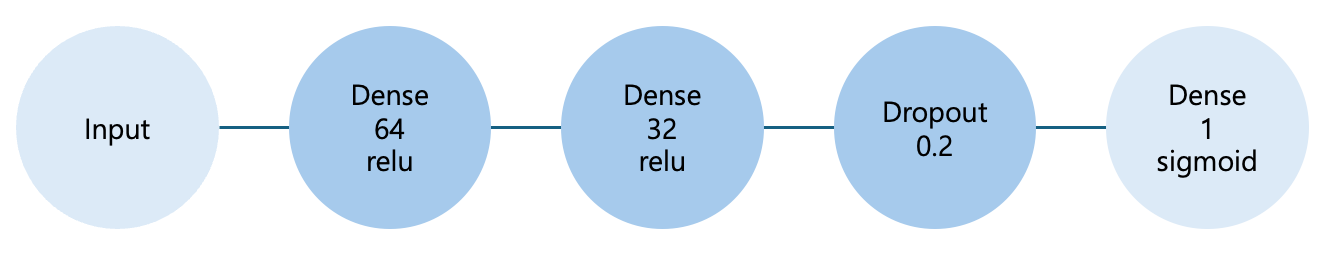

In [ ]:
# 여기에 답안코드를 작성하세요.
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')])

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
cp = ModelCheckpoint("./best_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=64,
                  validation_data=(X_valid, y_valid), callbacks=[es, cp])


<br>

### 17. 16번 딥러닝 모델의 성능을 평가하려고 합니다.
---
Matplotlib 라이브러리를 활용해서 학습 acc와 검증 acc를 그래프로 표시하세요.
- 1개의 그래프에 학습 acc과 검증 acc 2가지를 모두 표시하세요.
- 위 2가지 각각의 범례를 'acc', 'val_acc'로 표시하세요.
- 그래프의 타이틀은 'Model Accuracy'로 표시하세요.
- X축에는 'Epochs'라고 표시하고 Y축에는 'Accuracy'라고 표시하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

<br>

### 18. 16번에서 저장한 딥러닝 모델을 불러와서 주어진 데이터로 시뮬레이션을 하려합니다.
---
다음 가이드를 따라 시뮬레이션을 진행하세요.
- tensorflow.keras.models의 load_model을 사용하여 모델을 불러옵니다.
- 주어진 시뮬레이션 데이터에 대해 예측결과를 구하고 심장병이 있으면 Y, 없으면 N을 답안18 변수에 저장하세요.(예: 답안18='Y')
---

In [ ]:
simul = np.array([[-2.1343147169579706, -1.7986947520452512, 0.19613666146467496, -0.4011025813393599, 0.49363436572638053, -0.7567361314550618, -0.794405967631868, 0.5059374430161635, 2.072429499108951, -0.5333551478959264, -0.23007120873170445, 0.8248425891063415, -0.4889348004153919, 0.672068842158008, -0.552235945051653]])

In [ ]:
# 여기에 답안코드를 작성하세요.
from tensorflow.keras.models import load_model

best = load_model('./best_model.h5')
res = best.predict(simul)
print(res)

답안18 = 'N'

모든 문제를 다 푸셨습니다. 고생하셨습니다.